#**오픈소스 팀 과제 - BERT를 활용한 대화 이진 분류 - 전유정**

허깅페이스(Hugging Face)에서 제공하는 transformer 라이브러리를 활용하여 한국어 BERT로 텍스트 대화 중에서 성적인 텍스트를 분류해보도록 하겠습니다.

1.1. 사용한 데이터
- 텍스트 윤리 검정 데이터
https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=558

1.2. 데이터셋 구조
총 44,998개의 데이터로 총 5개의 라벨로 이루어져 있습니다.
 - 일반 대화와 성적 대화만 추출
 - 데이터 결측치 제거
 - Okt 라이브러리를 활용한 토큰화
다음과 같은 과정을 통해 데이터 전처리를 진행하였으며, 최종 21,740개의 데이터로 간소화 하였으며, 라벨도 2개로 단축시켰습니다. + 성적인 대화의 수가 적어 정확성이 높지 않은 경우를 고려하여, 성적인 데이터셋을 학습 데이터로 추가시켰습니다.

2. 모델 학습

 2.1. 훈련-테스트 데이터 분할
2만 개의 데이터도 적은 수는 아니나 더 다양한 케이스를 학습하기 위해 20%를 test 데이터로 구분했습니다.

 2.2. BERT 토크나이저 불러오기

 2.3. DataLoader 구성

 2.4. BERT 모델 불러오기

 2.5. 모델 훈련

In [ ]:
!pip install pandas
!pip install numpy
!pip install pillow
!pip install konlpy
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 2.9 MB/s eta 0:00:00


In [ ]:


!pip install konlpy

In [ ]:
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Hannanum
from PIL import Image
import numpy as np

In [ ]:
df = pd.read_csv("test", sep='\t', header=None)

In [ ]:
df2 = pd.read_csv("test2", sep='\t', header=None)

In [ ]:
print(df)

       0      1    2  3               4                                      5
0      1  False  0.0  1    IMMORAL_NONE               <마미손> 이번에 해명 영상 올렸던데 봤어?
1      2  False  0.0  2    IMMORAL_NONE                   어 <염따> 제대로 큰일 난거 같던데
2      3   True  1.0  3   CENSURE,ABUSE             <염따> 뭐됐지 ㅋㅋ 그럴줄 알았다 티팔이 샛기
3      1  False  0.0  1    IMMORAL_NONE                     요즘 같은 시대에 모솔이 가능해?
4      2  False  0.0  2    IMMORAL_NONE                   흐음 글쎄.. 그럴 수도 있지, 뭐.
...   ..    ...  ... ..             ...                                    ...
44993  3   True  1.8  2  SEXUAL,CENSURE                         상의 탈의한 사진 보내줘 
44994  4   True  2.4  2    HATE,CENSURE                              틀딱 소리 하지마
44995  1  False  0.0  1    IMMORAL_NONE                             쟤 또 티비 나오네
44996  2   True  1.4  2         CENSURE  별로 이쁜지도 모르겠고 오히려 촌스럽게 생긴 것 같은데 계속 나오네
44997  3   True  1.8  2         CENSURE                        혹시 쟤도 빵구 장사 하나?

[44998 rows x 6 columns]


섹슈얼 데이터 csv (test 데이터)



In [ ]:
import pandas as pd

# 'SEXUAL' 포함된 데이터프레임 추출
sexual_df = df[df[4].str.contains("SEXUAL")]
sexual_df2 = df2[df2[4].str.contains("SEXUAL")]

# 대화 유형과 텍스트 메세지만 추출
selected_df1 = sexual_df.iloc[:, [4, 5]]
selected_df2 = sexual_df2.iloc[:, [4, 5]]

# 두 데이터프레임 병합
merged_sexual_df = pd.concat([selected_df1, selected_df2])

# CSV로 저장
merged_sexual_df.to_csv("selected_data.csv", index=False, header=None)

# 결과 출력
print(merged_sexual_df)


                         4                                              5
22     CENSURE,HATE,SEXUAL                 충격은 니가 ㅂㅈ 속에서 나올 때 니 엄마가 받는거고ㅋ
32                  SEXUAL                               어제 얘 따먹음 ㅋㅋ 물 콸콸
33            SEXUAL,CRIME                 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 영상 없음??? 담엔 찍어와라
34            SEXUAL,CRIME                                    오케 무조건이지 ㅋㅋ
38                  SEXUAL                       ㅈ물처럼 차버린 뇌내망상 배설하니까 시원하다
...                    ...                                            ...
12532               SEXUAL                  벌레 같은 것들이 다시 니들 엄마 자궁으로 들어가;;
12534               SEXUAL  어디서 몸굴리던 개버릇 남 못준다고 지금도 더럽게 몸 섞으면서 돈 벌고 있을 수도
12535               SEXUAL                             역시 한국 여자답게 잘 벌리는 듯
12540               SEXUAL                           밋틴건가... 차라리 다 벗지 ㅋㅋㅋ
12541               SEXUAL                                  ㄱㅊ도 걍 내놓고 다녀~

[5474 rows x 2 columns]


일상 대화 데이터 csv (test 데이터)

In [ ]:
import pandas as pd


# 'IMMORAL_NONE' 포함된 데이터프레임 추출
moral_df = df[df[4].str.contains("IMMORAL_NONE")]

# 대화 유형과 텍스트 메세지만 추출
moral_selected_df = moral_df.iloc[:, [4, 5]]

# 5천개 또는 가능한 최대 개수로 줄이기
sample_size = min(5500, len(moral_selected_df))
margerd_moral_df = moral_selected_df.sample(n=sample_size, random_state=1)

# CSV로 저장
margerd_moral_df.to_csv("selected_data.csv", index=False, header=None)

# 결과 출력
print(margerd_moral_df)


                  4                                             5
2165   IMMORAL_NONE                              저기 저 남자 성형한거 같지?
14850  IMMORAL_NONE                                   내가 친구면 연 끊음
40786  IMMORAL_NONE                            이번에 학폭 사건 가해자들 봤음?
7414   IMMORAL_NONE  네 취향은 <더픽스>였을수 있지만 <씨네마>가 취향인 사람들이 더 많을수도 있지
20133  IMMORAL_NONE                     그게 며느리 떄문인가 뭐 날씨가 안따라주는거지
...             ...                                           ...
17522  IMMORAL_NONE                    이번 시험 문제 완전 이상한것들 나오지 않았어?
13081  IMMORAL_NONE                            난 아파서 맞는것도 싫고 무섭던데
10555  IMMORAL_NONE           아이고 ㅠㅠ 외롭겠다 외로우니까 더더욱 우리가 친구가 되어줘야지
21293  IMMORAL_NONE                          한 때 내 최애 선수였다. 지켜줘ㅜㅜ
15409  IMMORAL_NONE                               나는 뭔가 근데 기적을 믿어

[5500 rows x 2 columns]


섹슈얼 데이터 + 일상 대화 데이터 csv화 (test 데이터)

In [ ]:
test_merged_df = pd.concat([merged_sexual_df, margerd_moral_df])
test_merged_df.to_csv("test_data.csv", index=False, header=None)
print(test_merged_df)

                         4                                    5
22     CENSURE,HATE,SEXUAL       충격은 니가 ㅂㅈ 속에서 나올 때 니 엄마가 받는거고ㅋ
32                  SEXUAL                     어제 얘 따먹음 ㅋㅋ 물 콸콸
33            SEXUAL,CRIME       ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 영상 없음??? 담엔 찍어와라
34            SEXUAL,CRIME                          오케 무조건이지 ㅋㅋ
38                  SEXUAL             ㅈ물처럼 차버린 뇌내망상 배설하니까 시원하다
...                    ...                                  ...
17522         IMMORAL_NONE           이번 시험 문제 완전 이상한것들 나오지 않았어?
13081         IMMORAL_NONE                   난 아파서 맞는것도 싫고 무섭던데
10555         IMMORAL_NONE  아이고 ㅠㅠ 외롭겠다 외로우니까 더더욱 우리가 친구가 되어줘야지
21293         IMMORAL_NONE                 한 때 내 최애 선수였다. 지켜줘ㅜㅜ
15409         IMMORAL_NONE                      나는 뭔가 근데 기적을 믿어

[10974 rows x 2 columns]


 섹슈얼 데이터 (train 데이터 = 모델 학습 데이터)

In [ ]:
train_df = pd.read_csv("train1.csv", sep='\t', header=None)

In [ ]:
train2_df = pd.read_csv("train2", sep='\t', header=None)

In [ ]:
train3_df = pd.read_csv("train3", sep='\t', header=None)

In [ ]:
train4_df = pd.read_csv("train4", sep='\t', header=None)

In [ ]:
print(train_df)

        0      1    2  3             4  \
0       1   True  2.0  1       CENSURE   
1       2   True  2.0  2       CENSURE   
2       3   True  2.0  1       CENSURE   
3       4   True  2.0  2       CENSURE   
4       1   True  1.0  1       CENSURE   
...    ..    ...  ... ..           ...   
348068  1  False  0.0  1  IMMORAL_NONE   
348069  2  False  0.0  2  IMMORAL_NONE   
348070  1  False  0.0  1  IMMORAL_NONE   
348071  3  False  0.0  2  IMMORAL_NONE   
348072  2  False  0.0  2  IMMORAL_NONE   

                                              5  
0                   부랴부랴 왔는데 아무도 안왔네. 시간개념들이 없네  
1                             맞아. 사람들이 진짜 개념이없다  
2                                  저렇게는 살지 말아야지  
3                        그러게 게으르고 멍청한 사람들은 맞아야해  
4                             인방 보는 남자는 거르는게 맞다  
...                                         ...  
348068                              나는 매일 죽고 싶어  
348069                 시한부도 열심히 사는데 너가 그러면 안 되지  
348070  애들이 똑똑해지긴 했는데 문제는 무식한 애들한테도 스마트폰이 생긴 

In [ ]:
import pandas as pd

# 'SEXUAL' 포함된 데이터프레임 추출
t_sexual_df = train_df[train_df[4].str.contains("SEXUAL")]
t_sexual_df2 = train2_df[train2_df[4].str.contains("SEXUAL")]
t_sexual_df3 = train3_df[train3_df[4].str.contains("SEXUAL")]
t_sexual_df4 = train4_df[train4_df[4].str.contains("SEXUAL")]

# 대화 유형과 텍스트 메세지만 추출
t_selected_df1 = t_sexual_df.iloc[:, [4, 5]]
t_selected_df2 = t_sexual_df2.iloc[:, [4, 5]]
t_selected_df3 = t_sexual_df3.iloc[:, [4, 5]]
t_selected_df4 = t_sexual_df4.iloc[:, [4, 5]]

# 두 데이터프레임 병합
merged_t_sexual_df = pd.concat([t_selected_df1, t_selected_df2, t_selected_df3, t_selected_df4])

# CSV로 저장
merged_t_sexual_df.to_csv("t_train_df_selected_data.csv", index=False, header=None)

# 결과 출력
print(merged_t_sexual_df)


                         4                                            5
5      HATE,CENSURE,SEXUAL                       특히 벗방보는 애들은 진짜 거세 시켜야함
6           CENSURE,SEXUAL                           볼 게 없어서 벗방을 보냐 ㅋㅋㅋ
11          CENSURE,SEXUAL                         에로배우들을 데려다가 아이돌을 만드네
12          CENSURE,SEXUAL                            쟤네들은 표정이 딱 야동인데..
26            ABUSE,SEXUAL                               줫빠지게 힘들어서 잣같았다
...                    ...                                          ...
12651               SEXUAL                걔 맨날 브라도 안 하고 와서 진짜 싸구려 같아 보여
12652               SEXUAL         그렇게 매번 브라 안 차는 건 자기 몸 보라고 광고하는 거 아님?
12653               SEXUAL                      진짜 그게 성매매하는 여자랑 다를 게 뭐냐
12663               SEXUAL          저정도면 놀아달라는 거 아닌가? 저 라인봐봐 만지면 으스러지겠어
12664               SEXUAL  저 언덕 사이에 손을 넣고 주물러주면 그럴걸 ㅋㅋ 본인도 바라고 있지 않을까?

[40907 rows x 2 columns]


In [ ]:
import pandas as pd

# 'IMMORAL_NONE' 포함된 데이터프레임 추출
t_moral_df = train_df[train_df[4].str.contains("IMMORAL_NONE")]
t_moral_df2 = train2_df[train2_df[4].str.contains("IMMORAL_NONE")]

# 대화 유형과 텍스트 메세지만 추출
t_moral_selected_df = t_moral_df.iloc[:, [4, 5]]
t_moral_selected_df2 = t_moral_df2.iloc[:, [4, 5]]

# 두 데이터프레임 병합
merged_df = pd.concat([t_moral_selected_df, t_moral_selected_df2])

# 40100개 또는 가능한 최대 개수로 줄이기
sample_size = min(41000, len(merged_df))
merged_t_moral_df = merged_df.sample(n=sample_size, random_state=1)

# CSV로 저장
merged_t_moral_df.to_csv("t_selected_data.csv", index=False, header=None)

# 결과 출력
print(merged_t_moral_df)

                   4                              5
341723  IMMORAL_NONE                      안돼 무조건 안돼
319792  IMMORAL_NONE                      진짜 놀랄 노짜다
197153  IMMORAL_NONE  관심을 갖기 시작해야 나중에 정치관을 가질 수 있지요
196809  IMMORAL_NONE                 우리 내전 이길 수 있을까
192010  IMMORAL_NONE              그럴 거면 그냥 난 집에서 쉴래
...              ...                            ...
252960  IMMORAL_NONE                 미간은 수술할 방법이 없나
263663  IMMORAL_NONE            걔네 커뮤니티에 좌표 찍혔나보다ㅋㅋ
14337   IMMORAL_NONE       그러게. 난 저런 인품 좋은 사람이 좋던데.
18204   IMMORAL_NONE              아... 그 생각을 못했네 ㅋㅋ
184054  IMMORAL_NONE             나 피자 먹방 하는 거 잘 봤냐?

[41000 rows x 2 columns]


In [ ]:
# 대화 유형이 "ABUSE", "VIOLENCE", "CRIME" 중 하나를 단독으로 포함하는 대화 추출
t_violence_df = train_df[train_df[4].str.contains("VIOLENCE|CRIME")]

# 대화 유형과 텍스트 메세지만 추출
t_violence_selected_df = t_violence_df.iloc[:, [4, 5]]

# CSV로 저장
t_violence_selected_df.to_csv("t_violence_selected_df.csv", index=False, header=None)
print(t_violence_selected_df)

                             4                                           5
33      CENSURE,VIOLENCE,CRIME           정신병에 걸렸다고 생각되는데, 가장 확실한 치료는 사형이다.
48            CENSURE,VIOLENCE                        이 지긋지긋한 정부 작살을 내고 싶다
87       HATE,CENSURE,VIOLENCE                         짜증나게 하지말고 나가서 죽어버려라
101              HATE,VIOLENCE            하 이런 애들은 총으로 머리 깨서 뭐 들어있나 좀 보고싶다
133      HATE,VIOLENCE,CENSURE  너같은 것들이 딸배하면 배달음식 받기 전에 배때기에 칼 쑤실 준비해야 된다.
...                        ...                                         ...
347862          VIOLENCE,CRIME                  목사들 교회에 몰아놓고 불태워 죽이고싶네 ㅋㅋㅋ
347980                   CRIME                                그냥 마시고 튈 거야.
348019                VIOLENCE                               너나 파. 난 정상이야.
348032   HATE,CENSURE,VIOLENCE                            일베충들은 사회악이다 자살해라
348033   VIOLENCE,HATE,CENSURE                         믹서기에 갈아죽여도 시원치않을 것들

[18384 rows x 2 columns]


In [ ]:
t_merged_df = pd.concat([merged_t_sexual_df, merged_t_moral_df])
t_merged_df.to_csv("t_test_data.csv", index=False, header=None)
print(t_merged_df)

                          4                         5
5       HATE,CENSURE,SEXUAL    특히 벗방보는 애들은 진짜 거세 시켜야함
6            CENSURE,SEXUAL        볼 게 없어서 벗방을 보냐 ㅋㅋㅋ
11           CENSURE,SEXUAL      에로배우들을 데려다가 아이돌을 만드네
12           CENSURE,SEXUAL         쟤네들은 표정이 딱 야동인데..
26             ABUSE,SEXUAL            줫빠지게 힘들어서 잣같았다
...                     ...                       ...
252960         IMMORAL_NONE            미간은 수술할 방법이 없나
263663         IMMORAL_NONE       걔네 커뮤니티에 좌표 찍혔나보다ㅋㅋ
14337          IMMORAL_NONE  그러게. 난 저런 인품 좋은 사람이 좋던데.
18204          IMMORAL_NONE         아... 그 생각을 못했네 ㅋㅋ
184054         IMMORAL_NONE        나 피자 먹방 하는 거 잘 봤냐?

[81907 rows x 2 columns]


In [ ]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
# 섹슈얼 데이터에서 전처리할 텍스트
text_column =merged_df.iloc[:, 1]
print(text_column)

10               쉴드가 아니라 국가가 면제해준거야.
17                     짐승입장도 들어봐야지ㅋㅋ
19                 <이름>이 이제 급하긴 한가보네
20                    깐부라고 부르기까지 하다니
22       어머니 간 이식 해 주기 싫어서 도망쳤다고...?
                    ...             
45929    기다려라. 이 언니가 먼저 경험하고 조언해줄테니.
45930        피해자가 왜 2차 피해까지 당해야 하는거지
45931                 법도 세상도 너무하다 정말
45932           너희 가족이라도 그런소리 할수 있어?
45933            피해자들을 두번 죽이는 발언이잖아.
Name: 5, Length: 187671, dtype: object


In [ ]:
print(merged_df)

                  4                            5
10     IMMORAL_NONE          쉴드가 아니라 국가가 면제해준거야.
17     IMMORAL_NONE                짐승입장도 들어봐야지ㅋㅋ
19     IMMORAL_NONE            <이름>이 이제 급하긴 한가보네
20     IMMORAL_NONE               깐부라고 부르기까지 하다니
22     IMMORAL_NONE  어머니 간 이식 해 주기 싫어서 도망쳤다고...?
...             ...                          ...
45929  IMMORAL_NONE  기다려라. 이 언니가 먼저 경험하고 조언해줄테니.
45930  IMMORAL_NONE      피해자가 왜 2차 피해까지 당해야 하는거지
45931  IMMORAL_NONE               법도 세상도 너무하다 정말
45932  IMMORAL_NONE         너희 가족이라도 그런소리 할수 있어?
45933  IMMORAL_NONE          피해자들을 두번 죽이는 발언이잖아.

[187671 rows x 2 columns]


In [ ]:
from konlpy.tag import Okt
import re
import pandas as pd

# 섹슈얼 데이터만 추출한 데이터프레임인 sexual_df가 이미 생성되어 있다고 가정합니다.
# 여기에 대해 전처리 작업을 수행하겠습니다.

# 형태소 분석기 초기화
tokenizer = Okt()

# 텍스트 전처리 함수
def preprocess_text(text):
    # 특수문자 및 반복적인 문자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    # "ㅋㅋ, ㅎㅎ"와 같은 특정한 문자열 패턴 제거
    text = re.sub(r'ㅋ+', '', text)
    text = re.sub(r'ㅎ+', '', text)
    text = re.sub(r'ㅠ+', '', text)
    text = re.sub(r'ㅡㅡ', '', text)
    text = re.sub(r'(.)\1+', r'\1\1', text)  # 반복적인 문자 축약
    # 형태소 분석 및 불용어 처리
    morphs = tokenizer.morphs(text)
    stopwords = ['의','가','에','들','는','잘','걍','과','도','를','으로','한','하다', '히', '힣', '흠', '!','?','<','>','(',')','[',']','|','#','.']
    filtered_morphs = [word for word in morphs if not word in stopwords]
    return filtered_morphs

# 2번째 열 선택 (대화 텍스트)
text_column = test_merged_df.iloc[:, 1]

# 열을 문자열로 변환
text_column_str = text_column.astype(str)

# 텍스트 전처리 적용
preprocessed_text_column = text_column_str.apply(preprocess_text)

# 1번째 열 선택 (moral, sexual 라벨)
id_column = test_merged_df.iloc[:, 0]

# 1번째 열과 2번째 열 (라벨, 텍스트) 합쳐서 하나로 반환
result_df = pd.concat([id_column, preprocessed_text_column], axis=1)

# CSV로 저장
result_df.to_csv("result_df.csv", index=False, header=None)
print(result_df)

                         4                                             5
22     CENSURE,HATE,SEXUAL     [충격, 은, 니, ㅂㅈ, 속, 에서, 나올, 때, 니, 엄마, 받는거고]
32                  SEXUAL                           [어제, 얘, 따먹음, 물, 콸콸]
33            SEXUAL,CRIME                        [영상, 없음, 담, 엔, 찍어, 와라]
34            SEXUAL,CRIME                                 [오케, 무조건, 이지]
38                  SEXUAL  [ㅈ, 물, 처럼, 차, 버린, 뇌, 내, 망상, 배설, 하, 니까, 시원하다]
...                    ...                                           ...
17522         IMMORAL_NONE              [이번, 시험, 문제, 완전, 이상한것, 나오지, 않았어]
13081         IMMORAL_NONE                      [난, 아파서, 맞는것도, 싫고, 무섭던데]
10555         IMMORAL_NONE      [아이고, 외롭겠다, 외로우니까, 더, 더욱, 우리, 친구, 되어줘야지]
21293         IMMORAL_NONE                     [때, 내, 최애, 선수였다, 지켜줘, ㅜㅜ]
15409         IMMORAL_NONE                        [나, 뭔가, 근데, 기적, 을, 믿어]

[10974 rows x 2 columns]


In [ ]:
from konlpy.tag import Okt
import re
import pandas as pd

# 섹슈얼 데이터만 추출한 데이터프레임인 sexual_df가 이미 생성되어 있다고 가정합니다.
# 여기에 대해 전처리 작업을 수행하겠습니다.

# 형태소 분석기 초기화
tokenizer = Okt()

# 텍스트 전처리 함수
def preprocess_text(text):
    # 특수문자 및 반복적인 문자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    # "ㅋㅋ, ㅎㅎ"와 같은 특정한 문자열 패턴 제거
    text = re.sub(r'ㅋ+', '', text)
    text = re.sub(r'ㅎ+', '', text)
    text = re.sub(r'ㅠ+', '', text)
    text = re.sub(r'ㅡㅡ', '', text)
    text = re.sub(r'(.)\1+', r'\1\1', text)  # 반복적인 문자 축약
    # 형태소 분석 및 불용어 처리
    morphs = tokenizer.morphs(text)
    stopwords = ['의','가','에','들','는','잘','걍','과','도','를','으로','한','하다', '히', '힣', '흠', '!','?','<','>','(',')','[',']','|','#','.']
    filtered_morphs = [word for word in morphs if not word in stopwords]
    return filtered_morphs

# 2번째 열 선택 (대화 텍스트)
t_text_column = t_merged_df.iloc[:, 1]

# 열을 문자열로 변환
t_text_column_str = t_text_column.astype(str)

# 텍스트 전처리 적용
t_preprocessed_text_column = t_text_column_str.apply(preprocess_text)

# 1번째 열 선택 (moral, sexual 라벨)
t_id_column = t_merged_df.iloc[:, 0]

# 1번째 열과 2번째 열 (라벨, 텍스트) 합쳐서 하나로 반환
t_result_df = pd.concat([t_id_column, t_preprocessed_text_column], axis=1)

# CSV로 저장
t_result_df.to_csv("t_result_df.csv", index=False, header=None)
print(t_result_df)

                          4                                   5
5       HATE,CENSURE,SEXUAL  [특히, 벗방, 보는, 애, 은, 진짜, 거세, 시켜, 야함]
6            CENSURE,SEXUAL              [볼, 게, 없어서, 벗방, 을, 보냐]
11           CENSURE,SEXUAL    [에로, 배우, 을, 데려다가, 아이돌, 을, 만드, 네]
12           CENSURE,SEXUAL        [쟤, 네, 들은, 표정, 이, 딱, 야동, 인데]
26             ABUSE,SEXUAL              [줫빠지, 게, 힘들어서, 잣, 같았다]
...                     ...                                 ...
252960         IMMORAL_NONE         [미, 간, 은, 수술, 할, 방법, 이, 없나]
263663         IMMORAL_NONE               [걔네, 커뮤니티, 좌표, 찍혔나보다]
14337          IMMORAL_NONE    [그러게, 난, 저런, 인품, 좋은, 사람, 이, 좋던데]
18204          IMMORAL_NONE                [아, 그, 생각, 을, 못, 했네]
184054         IMMORAL_NONE              [나, 피자, 먹방, 하는, 거, 봤냐]

[81907 rows x 2 columns]


BERT 모델링


In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# 트레인 데이터 로드 및 전처리
train_data = pd.read_csv("t_result_df.csv", header=None, names=['label', 'text'])
train_data['label'] = train_data['label'].apply(lambda x: 0 if x == 'IMMORAL_NONE' else 1)


# 테스트 데이터 로드 및 전처리
test_data = pd.read_csv("result_df.csv", header=None, names=['label', 'text'])
test_data['label'] = test_data['label'].apply(lambda x: 0 if x == 'IMMORAL_NONE' else 1)


In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer

class WeatherDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]['text']  # 전처리된 문장.
        label = self.dataframe.iloc[idx]['label']  # 날씨 라벨.

        # BERT 토크나이저를 사용하여 텍스트를 인코딩합니다.
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_attention_mask=True,
            return_token_type_ids=False,
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)  # 라벨을 torch tensor로 변환
        }


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
max_length = 128

# 데이터셋 및 데이터로더 생성
train_dataset = WeatherDataset(train_data, tokenizer, max_length)
test_dataset = WeatherDataset(test_data, tokenizer, max_length)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# BERT 모델 로드
model = BertForSequenceClassification.from_pretrained(
    'bert-base-multilingual-cased',
    num_labels=2,  # 총 2개로 분류
    output_attentions=False,
    output_hidden_states=False
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

criterion = torch.nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['rain_intensity'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        correct_predictions += torch.sum(predictions == labels).item()
        total_predictions += len(labels)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    accuracy = correct_predictions / total_predictions
    return epoch_loss / len(data_loader), accuracy

def evaluate(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            correct_predictions += torch.sum(predictions == labels).item()
            total_predictions += len(labels)
            loss = criterion(outputs.logits, labels)
            epoch_loss += loss.item()
    accuracy = correct_predictions / total_predictions
    return epoch_loss / len(data_loader), accuracy


In [ ]:
!pip install tqdm scikit-learn

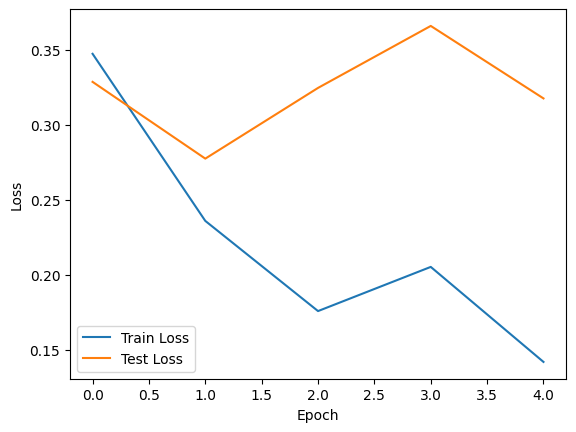

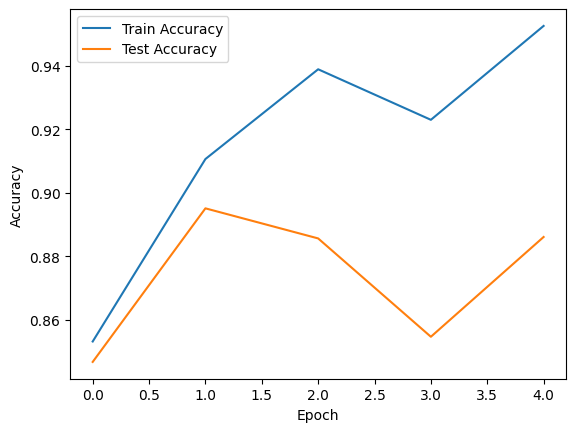

In [ ]:
from tqdm import tqdm

train_losses = []  # 훈련 손실 값 저장 리스트
test_losses = []   # 테스트 손실 값 저장 리스트
train_accuracies = []  # 훈련 정확도 값 저장 리스트
test_accuracies = []   # 테스트 정확도 값 저장 리스트

num_epochs = 5
for epoch in range(num_epochs):
    train_loss = 0
    test_loss = 0
    train_correct = 0
    test_correct = 0
    train_total = 0
    test_total = 0

    # 훈련 데이터 학습
    train_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/ {num_epochs}', leave=False)
    for batch in train_progress_bar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        train_correct += torch.sum(predictions == labels).item()
        train_total += len(labels)

        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_progress_bar.set_postfix({'loss': loss.item()})

    train_losses.append(train_loss / len(train_loader))
    train_accuracy = train_correct / train_total
    train_accuracies.append(train_accuracy)

    # 평가 데이터 평가
    test_progress_bar = tqdm(test_loader, desc='Test', leave=False)
    with torch.no_grad():
        for batch in test_progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            test_correct += torch.sum(predictions == labels).item()
            test_total += len(labels)

            loss = criterion(outputs.logits, labels)

            test_loss += loss.item()
            test_progress_bar.set_postfix({'loss': loss.item()})

    test_losses.append(test_loss / len(test_loader))
    test_accuracy = test_correct / test_total
    test_accuracies.append(test_accuracy)

# 손실 값 시각화
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 값 시각화
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# 모델과 옵티마이저 상태 저장
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, 'model_and_optimizer.pth')

과적합...인 것 같아서 train 데이터를 새로 파서 해보겠습니다~!

In [ ]:
!pip install konlpy


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# BERT 모델과 토크나이저 불러오기
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# GPU를 사용할 수 있다면 GPU로 모델을 이동
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 새로운 텍스트를 분류하는 함수 정의
def classify_text(text):
    # 전처리: 텍스트를 BERT 모델의 입력 형식으로 변환
    encoded_text = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)

    # 모델 추론
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        probabilities = torch.softmax(outputs.logits, dim=1)
        predicted_class = torch.argmax(probabilities).item()  # 가장 높은 확률을 가진 클래스 선택

    return predicted_class

# 새로운 텍스트 입력
new_text = "와 저 여자 앞뒤가 똑같아 ㅋㅋㅋㅋㅋ"
# 텍스트 분류 결과 출력
classification_result = classify_text(new_text)
if classification_result == 1:
    print("이 문장은 성적인 내용을 담고 있습니다.")
else:
    print("이 문장은 성적인 내용을 담고 있지 않습니다.")

In [ ]:
# 새로운 텍스트 입력
new_text = "나 어제 성매매 하고 왔다"
# 텍스트 분류 결과 출력
classification_result = classify_text(new_text)
if classification_result == 1:
    print("이 문장은 성적인 내용을 담고 있습니다.")
else:
    print("이 문장은 성적인 내용을 담고 있지 않습니다.")

이 문장은 성적인 내용을 담고 있지 않습니다.


In [ ]:
# 새로운 텍스트 입력
new_text = "여자친구 보고 싶다"
# 텍스트 분류 결과 출력
classification_result = classify_text(new_text)
if classification_result == 1:
    print("이 문장은 성적인 내용을 담고 있습니다.")
else:
    print("이 문장은 성적인 내용을 담고 있지 않습니다.")

In [ ]:
# 새로운 텍스트 입력
new_text = "오픈소스 프로그래밍 과제 해야 돼"
# 텍스트 분류 결과 출력
classification_result = classify_text(new_text)
if classification_result == 1:
    print("이 문장은 성적인 내용을 담고 있습니다.")
else:
    print("이 문장은 성적인 내용을 담고 있지 않습니다.")

이 문장은 성적인 내용을 담고 있습니다.
